In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bottom_line = [0,5]
finger_line = [0,1]
thumb_ver = [0,3]
forefinger_ver = [0,4]
middlefinger_ver = [0,4.5]
ringfinger_ver = [0,4.25]
littlefinger_ver = [0,3.7]

bottom_line = [[0,0], [0,5]]
'''fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')'''

"fig = plt.figure(figsize=(12,10))\nax = fig.add_subplot(projection='3d')"

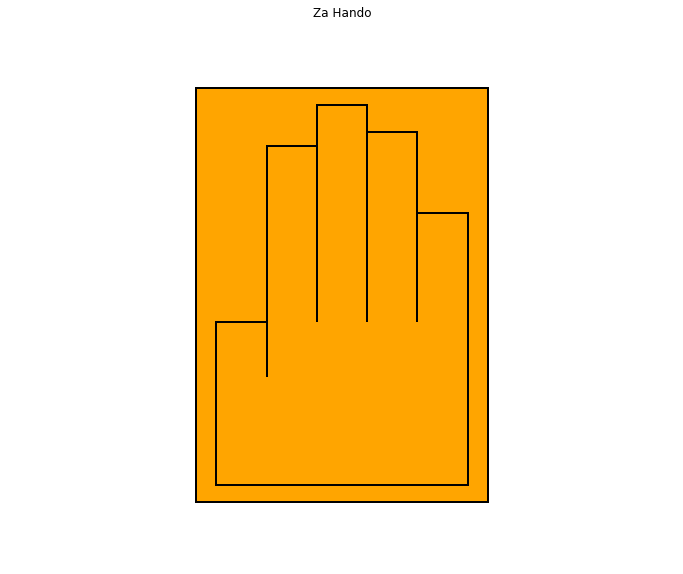

In [21]:
from matplotlib.path import Path
import matplotlib.patches as patches


# (x,y)
verts = [
    (0.,0.),
    (5.,0.),
    (5.,5.), # little finger
    (4.,5.), # little finger
    (4.,3.), # separate fingers
    (4.,6.5), # ring finger
    (3.,6.5), # ring finger
    (3.,3.), # separate fingers
    (3.,7.), # middle finger
    (2.,7.), # middle finger
    (2.,3.), # separate fingers
    (2.,6.25), # forefinger
    (1.,6.25), #forefinger
    (1.,2.), # separate fingers
    (1.,3.), # thumb
    (0.,3.), # thumb
    (0.,0.)
]

scale_verts = [(i[0]*0.75, i[1]) for i in verts]

##--- Centre the figure ---##
x_max = np.max([i[0] for i in scale_verts])
x_min = np.min([i[0] for i in scale_verts])

y_max = np.max([i[1] for i in scale_verts])
y_min = np.min([i[1] for i in scale_verts])

new_scale_verts = [(i[0]-x_max/2, i[1]-y_max/2) for i in scale_verts]
##--- Centre the figure ---##

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(new_scale_verts, codes)

fig, ax = plt.subplots(figsize=(12,10))
patch = patches.PathPatch(path, facecolor='orange', lw=2)
#ax.add_patch(patch)

###### background patch ######
threshold = 0.3

verts1 = [
    (-x_max/2 - threshold, -y_max/2 - threshold),
    (x_max/2 + threshold, -y_max/2 - threshold),
    (x_max/2 + threshold, y_max/2 + threshold),
    (-x_max/2 - threshold, y_max/2 + threshold),
    (-x_max/2 - threshold, -y_max/2 - threshold)
]

codes1 = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path1 = Path(verts1, codes1)
patch1 = patches.PathPatch(path1, facecolor='orange', lw=2)
###### background patch ######

# add patches
ax.add_patch(patch1)
ax.add_patch(patch)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.axis("off")
plt.title("Za Hando")
plt.show()

In [61]:
def rotation_matrix(theta:float) -> np.ndarray:
    return np.array([
        [np.cos(theta), - np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

rotation_matrix(np.pi)
roll = np.linspace(-np.pi, np.pi, endpoint=True,num=5)

In [69]:
roll = np.linspace(-np.pi, np.pi, endpoint=False,num=10)
rad_angle = roll[3]
print(rad_angle)
rot_mat = rotation_matrix(rad_angle)
print(rot_mat)
verts = np.array(
    [i@rot_mat for i in verts1]
)
print([i@rot_mat for i in verts1])
print([rot_mat@i for i in verts1])

-1.2566370614359172
[[ 0.30901699  0.95105652]
 [-0.95105652  0.30901699]]
[array([ 2.9419028, -3.2428125]), array([4.28612672, 0.89428334]), array([-2.9419028,  3.2428125]), array([-4.28612672, -0.89428334])]
[array([-4.28612672,  0.89428334]), array([-2.9419028, -3.2428125]), array([ 4.28612672, -0.89428334]), array([2.9419028, 3.2428125])]


In [ ]:
roll = np.linspace(-np.pi, np.pi, endpoint=False,num=60)
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point
verts1 = np.array([
    [-x_max/2 - threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, y_max/2 + threshold],
    #[-x_max/2 - threshold, -y_max/2 - threshold]
])

idx = 0

for rad_angle in roll:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot()
    rot_mat = rotation_matrix(rad_angle)
    verts = np.array(
        [rot_mat@v for v in verts1]
    )
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.scatter(verts[:,0], verts[:,1])
    ax.quiver(*origin, verts[:,0], verts[:,1], color=['r','b','g','k'], scale=50)
    if idx < 10:
        plt.savefig(f"rotation_test/0{idx}_test.png", format='png')
        idx += 1
    else:
        plt.savefig(f"rotation_test/{idx}_test.png", format='png')
        idx += 1
    plt.show()

In [82]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('rotation_test/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rotation_test.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

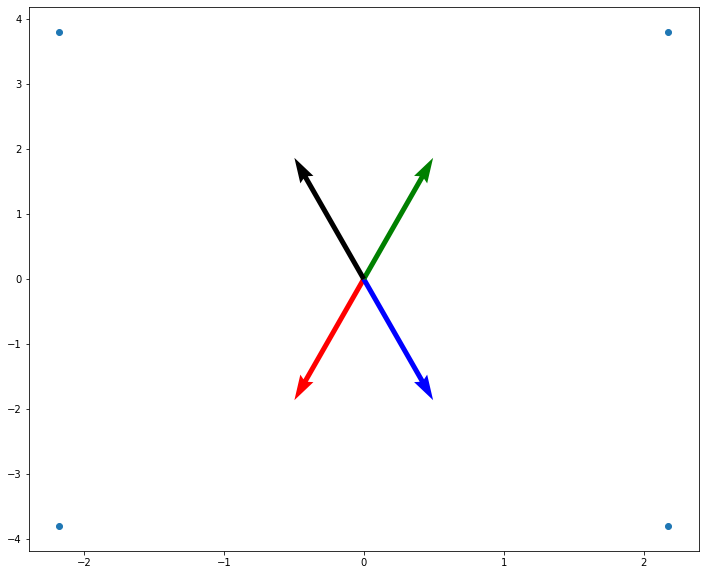

In [83]:
import numpy as np
import matplotlib.pyplot as plt

verts1 = np.array([
    [-x_max/2 - threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, y_max/2 + threshold],
    #[-x_max/2 - threshold, -y_max/2 - threshold]
])

V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point

plt.figure(figsize=(12,10))
plt.scatter(verts1[:,0], verts1[:,1])
plt.quiver(*origin, verts1[:,0], verts1[:,1], color=['r','b','g','k'], scale=21)
#plt.show()

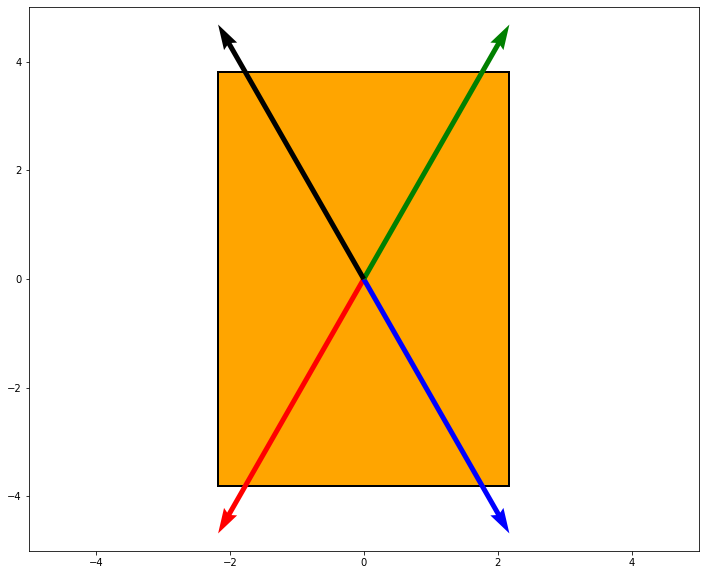

<Figure size 864x720 with 0 Axes>

In [85]:
fig, ax = plt.subplots(figsize=(12,10))
patch = patches.PathPatch(path, facecolor='orange', lw=2)
#ax.add_patch(patch)

###### background patch ######
threshold = 0.3

verts1 = np.array([
    [-x_max/2 - threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, -y_max/2 - threshold],
    [x_max/2 + threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, y_max/2 + threshold],
    [-x_max/2 - threshold, -y_max/2 - threshold]
])

codes1 = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path1 = Path(verts1, codes1)
patch1 = patches.PathPatch(path1, facecolor='orange', lw=2)
###### background patch ######

# add patches
ax.add_patch(patch1)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
#plt.axis("off")
#plt.title("Za Hando")

# -- vectors -- #
from locale import normalize
import numpy as np
import matplotlib.pyplot as plt

#V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point

plt.figure(figsize=(12,10))
ax.quiver(*origin, verts1[:-1,0], verts1[:-1,1], color=['r','b','g','k'], scale=10)
# -- vectors -- #

plt.show()

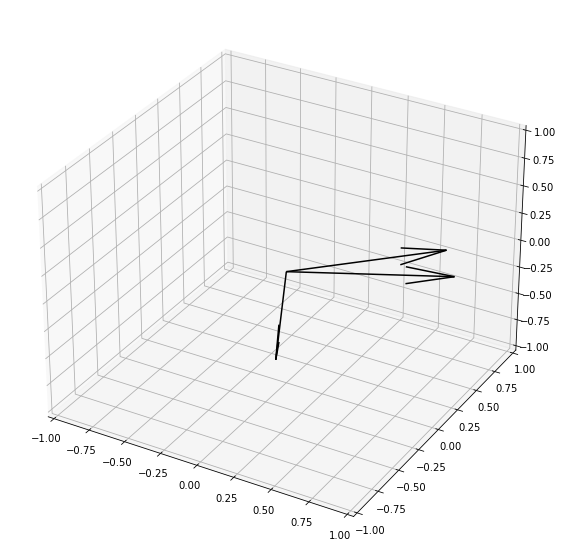

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[1, -2, 0], [1, 1, 0],
                [2, 1, 0]])

origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point


U, V, W = zip(*soa)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.quiver(*origin, U, V, W, color=['k','k','k'], length=1, normalize=True)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

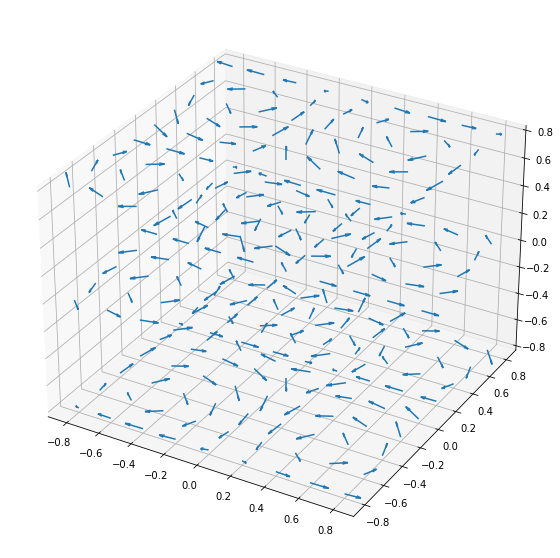

In [51]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()


-----

In [36]:
import numpy as np

def float_to_radiant():
    #TODO
    return None

def roll_x_rotation(theta:float=np.pi/2) -> np.ndarray:
    rot_mat = np.array([
        [1,             0,              0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), +np.cos(theta)]
        ], dtype=float)
    return rot_mat

def pitch_y_rotation(theta:float=np.pi/2) -> np.ndarray:
    rot_mat = np.array([
        [+np.cos(theta), 0, np.sin(theta)],
        [0,              1,              0],
        [-np.sin(theta), 0, +np.cos(theta)]
        ], dtype=float)
    return rot_mat

def yaw_z_rotation(theta:float=np.pi/2) -> np.ndarray:
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), +np.cos(theta), 0],
        [            0,              0, 1]
        ], dtype=float)
    return rot_mat

def rotation_matrix(roll_angle:float, pitch_angle:float, yaw_angle:float) -> np.ndarray:
    roll_angle = np.pi*(roll_angle)#-.5)
    pitch_angle = np.pi*(pitch_angle)#-.5)
    yaw_angle = np.pi*yaw_angle
    roll_mat = roll_x_rotation(roll_angle)
    pitch_mat = pitch_y_rotation(pitch_angle)
    yaw_mat = yaw_z_rotation(yaw_angle)
    return yaw_mat@pitch_mat@roll_mat

In [2]:
rotation_matrix(np.pi, np.pi, np.pi)

array([[ 1.0000000e+00,  1.2246468e-16,  1.2246468e-16],
       [-1.2246468e-16,  1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.2246468e-16,  1.0000000e+00]])

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import utils


features_1 = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]


In [4]:
path = "./tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [5]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [6]:
X = df['time_series']
y = df['label']
seed = 0

In [7]:
X.iloc[0]
sx = X.iloc[0][:,3:6]
dx = X.iloc[0][:,3+11:6+11]
sx_roll, sx_pitch, sx_yaw = sx[:,0], sx[:,1], sx[:,2]
dx_roll, dx_pitch, dx_yaw = dx[:,0], dx[:,1], dx[:,2]

------
### check max and min of roll, pitch and yaw

In [8]:
#np.allclose(sx_roll, X.iloc[0][:,3])
np.min(dx_yaw), np.max(dx_yaw)

(0.527903, 0.666005)

In [9]:
d = dict()


for id in range(len(X)):
    l = []
    for i in range(X.iloc[id].shape[-1]):
        l.append(pd.Series(X.iloc[id][:,i]))
    d[id] = l

X_df = pd.DataFrame.from_dict(d, orient='index', columns=features_1)

In [10]:
columns = ['sx_roll','sx_pitch','sx_yaw', 'dx_roll','dx_pitch','dx_yaw']
X_df[columns].head(1)

sx_roll  \
0  0     0.626383
1     0.647282
2     0.646525
3...   

                                            sx_pitch  \
0  0     0.499976
1     0.486303
2     0.478735
3...   

                                              sx_yaw  \
0  0     0.506653
1     0.480203
2     0.466018
3...   

                                             dx_roll  \
0  0     0.233232
1     0.194742
2     0.183840
3...   

                                            dx_pitch  \
0  0     0.560134
1     0.585891
2     0.576174
3...   

                                              dx_yaw  
0  0     0.606738
1     0.632960
2     0.662819
3...

In [11]:
test_max = pd.DataFrame([X_df.iloc[i].apply(lambda x: np.max(x)) for i in range(len(X_df))])
test_min = pd.DataFrame([X_df.iloc[i].apply(lambda x: np.min(x)) for i in range(len(X_df))])
test_min.head()

sx_x      sx_y      sx_z   sx_roll  sx_pitch    sx_yaw  sx_thumb  \
0 -0.167157 -0.012699 -0.062360  0.422410  0.478735  0.453957  0.000000   
1 -0.110184 -0.151158 -0.113082  0.553285  0.200137  0.360680  0.154318   
2 -0.098040 -0.146291 -0.119601  0.589126  0.196670  0.290121  0.283684   
3 -0.145011  0.026950 -0.050260  0.453441  0.433177  0.547972  0.388920   
4 -0.151664 -0.144416 -0.049367  0.657292  0.206265  0.422486  0.197887   

   sx_forefinger  sx_middle_finger  sx_ring_finger  ...      dx_y      dx_z  \
0       0.000000               0.0             0.0  ... -0.002849 -0.065299   
1       0.000000               0.0             0.0  ... -0.124609 -0.124147   
2       0.000000               0.0             0.0  ... -0.142871 -0.121870   
3       0.073349               0.0             0.0  ...  0.001571 -0.124103   
4       0.000000               0.0             0.0  ... -0.163589 -0.074497   

    dx_roll  dx_pitch    dx_yaw  dx_thumb  dx_forefinger  dx_middle_finger  \
0  0.183840  0.451170  0.527903  0.000000            0.0               0.0   
1  0.208341  0.360152  0.540611  0.351706            0.0               0.0   
2  0.183328  0.317255  0.546995  0.498458            0.0               0.0   
3  0.217508  0.396432  0.516745  0.085787            0.0               0.0   
4  0.158827  0.300189  0.528526  0.309777            0.0               0.0   

   dx_ring_finger  dx_little_finger  
0             0.0          0.145143  
1             0.0          0.000000  
2             0.0          0.043766  
3             0.0          0.200490  
4             0.0          0.065137  

[5 rows x 22 columns]

In [12]:
test_max.max()[columns]

sx_roll     0.997842
sx_pitch    0.993448
sx_yaw      0.674636
dx_roll     0.997684
dx_pitch    0.997696
dx_yaw      0.987548
dtype: float64

In [13]:
test_min.min()[columns]

sx_roll     0.003024
sx_pitch    0.118787
sx_yaw      0.063674
dx_roll     0.000864
dx_pitch    0.036753
dx_yaw      0.001074
dtype: float64

--------

In [14]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

In [15]:
n_features_per_hand = 11
one_data[:,3+n_features_per_hand:6+n_features_per_hand].shape

(62, 3)

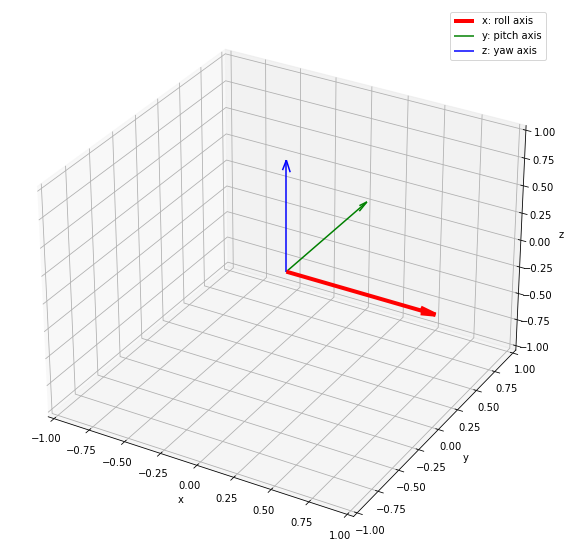

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
    
soa = np.array([[1, 0, 0], [0, 1, 0],
                [0, 0, 1]])

origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point


U, V, W = zip(*soa)
UVW = np.array([U, V, W])
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
#ax.quiver(*origin, UVW[0], UVW[1], UVW[2], color=['r','g','b'], length=1, normalize=True)
ax.quiver(*[0,0,0], *[1,0,0], color=['r'], length=1, label='x: roll axis', arrow_length_ratio=0.1, linewidths=4)
ax.quiver(*[0,0,0], *[0,1,0], color=['g'], length=1, label='y: pitch axis', arrow_length_ratio=0.1)
ax.quiver(*[0,0,0], *[0,0,1], color=['b'], length=1, label='z: yaw axis', arrow_length_ratio=0.1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [318]:
roll = np.linspace(-np.pi, np.pi, num=60)
pitch = np.linspace(-np.pi, np.pi, num=60)
yaw = np.linspace(-np.pi, np.pi, num=60)
np.stack([roll, pitch, yaw]).shape

(3, 60)

In [26]:
n_features_per_hand = 11
sx_stack = two_data[:,3:6]
dx_stack = two_data[:,3+n_features_per_hand:6+n_features_per_hand]
two_data.shape

(90, 22)

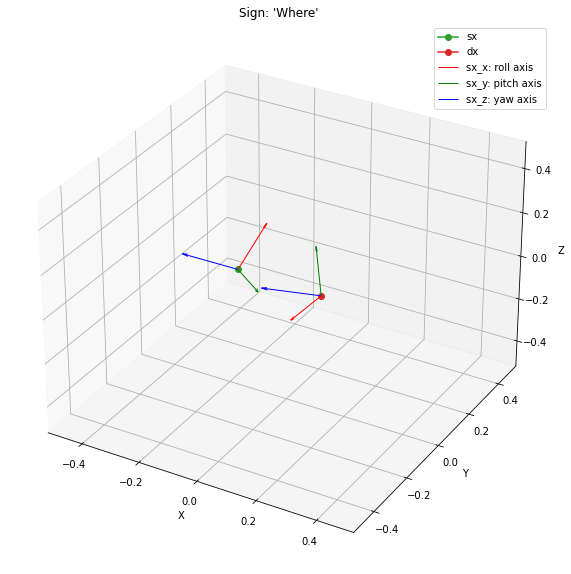

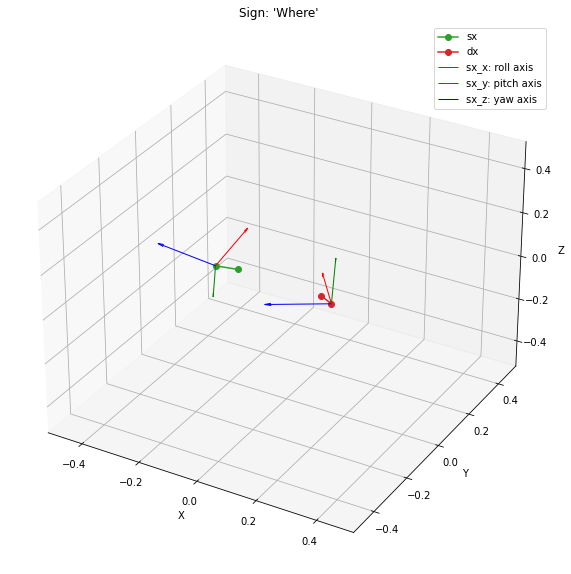

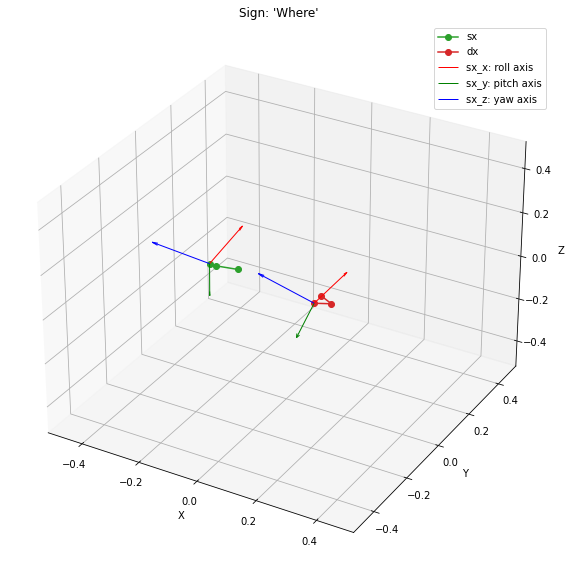

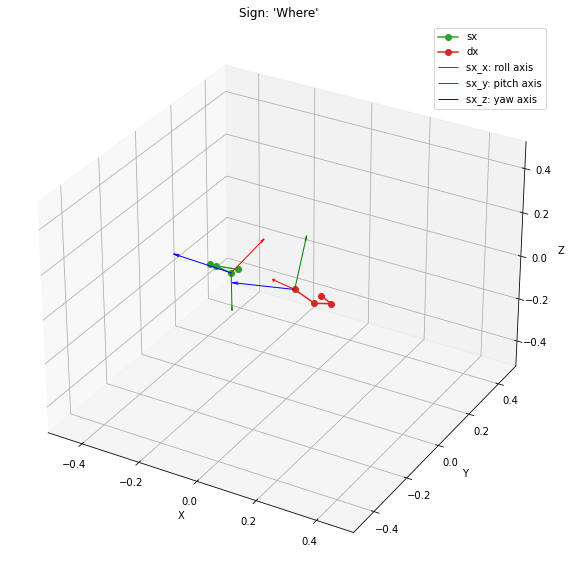

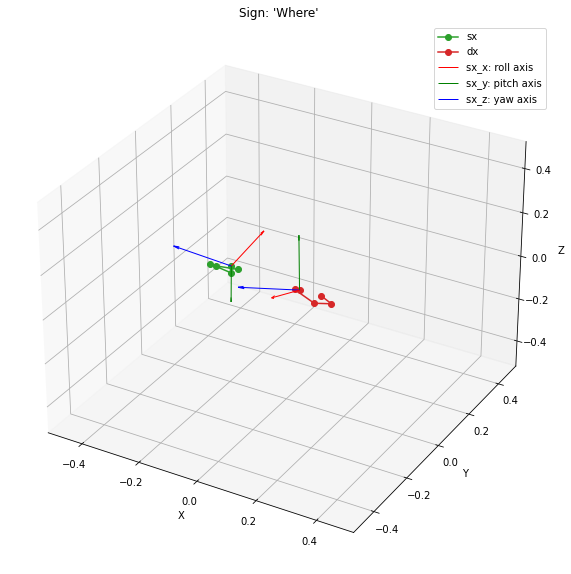

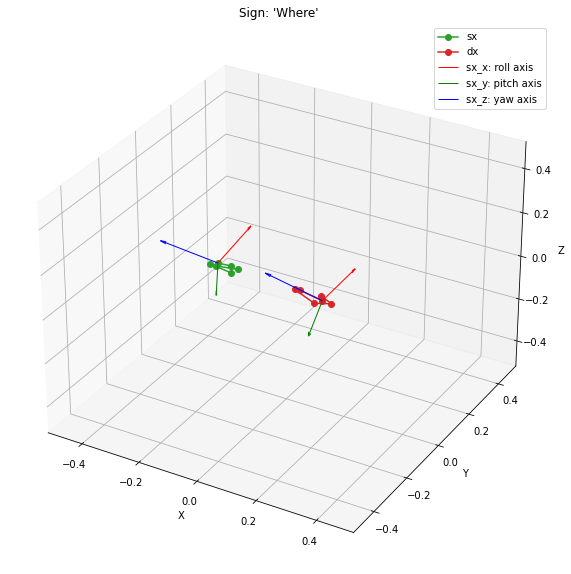

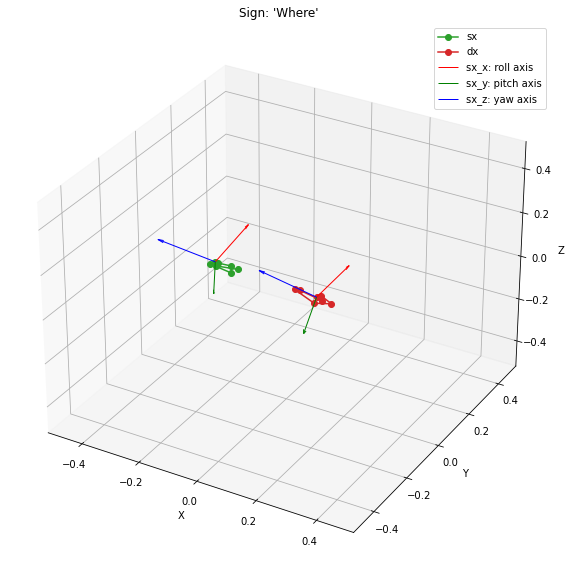

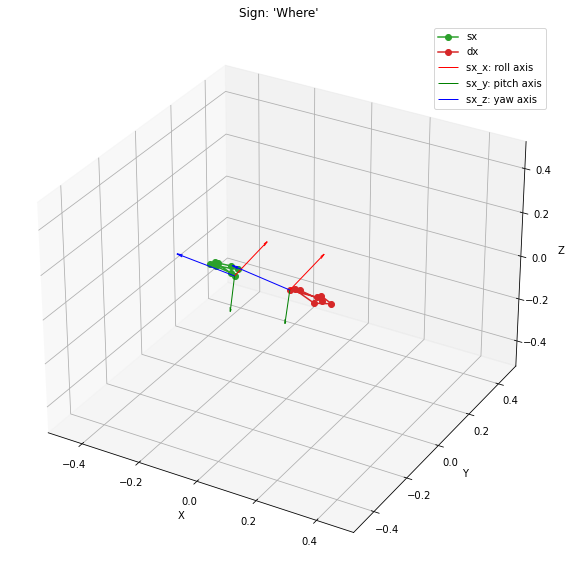

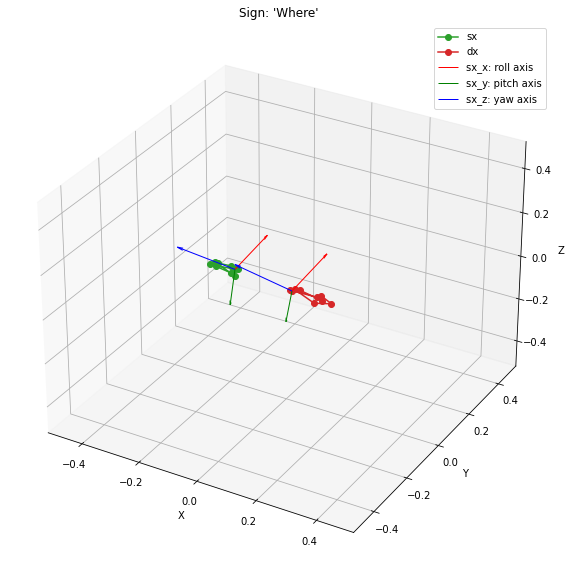

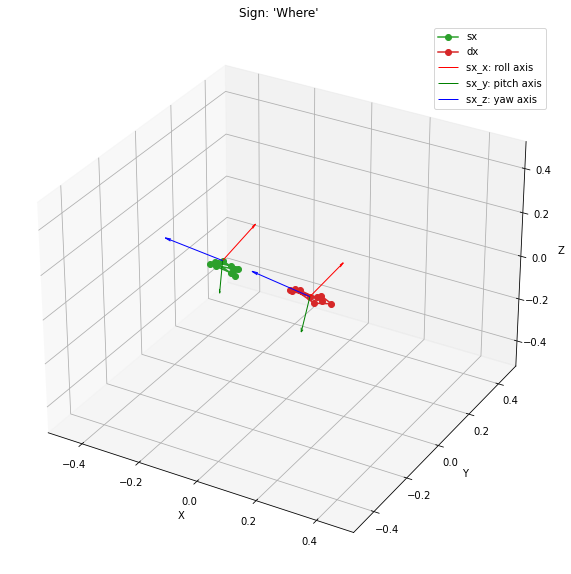

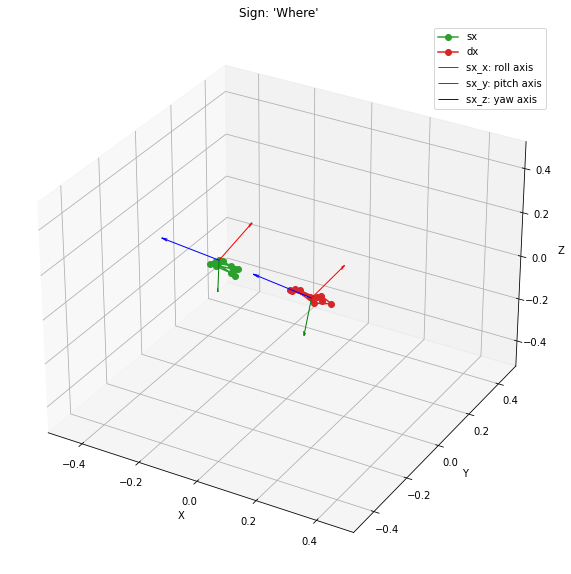

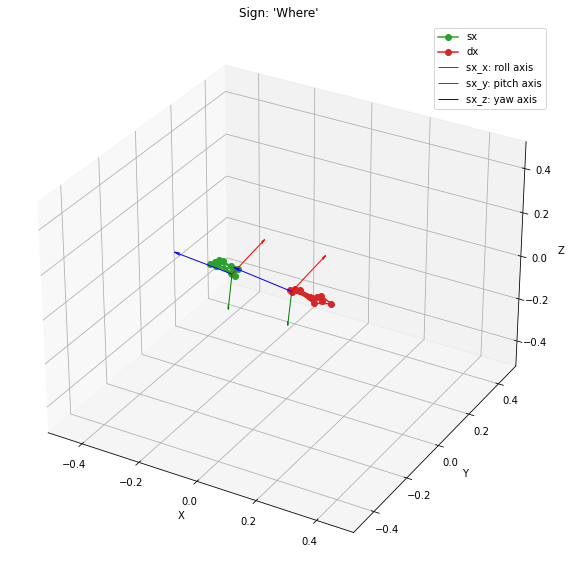

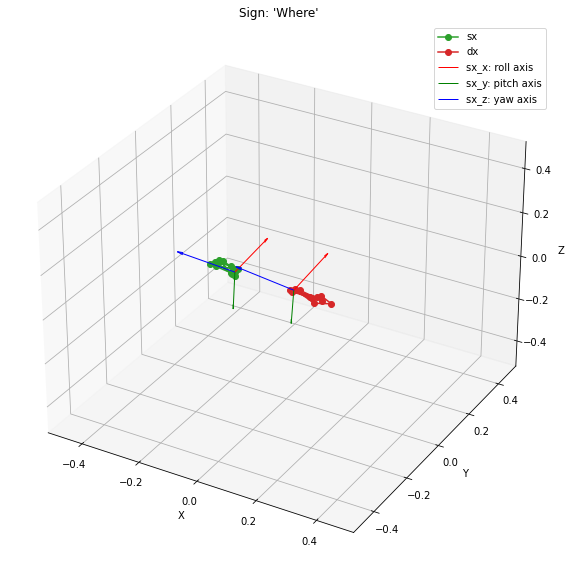

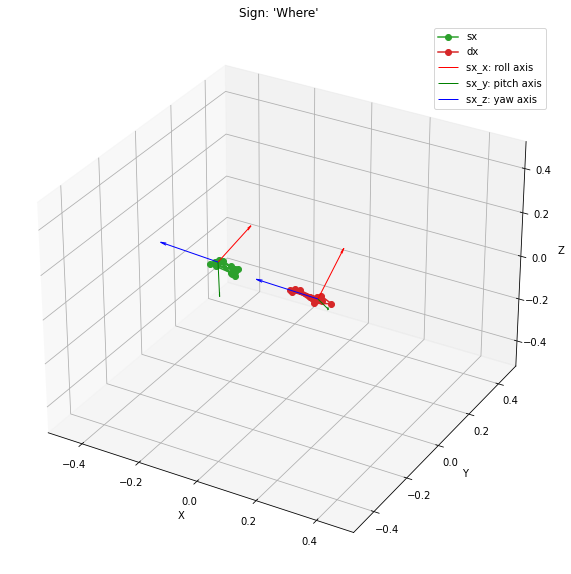

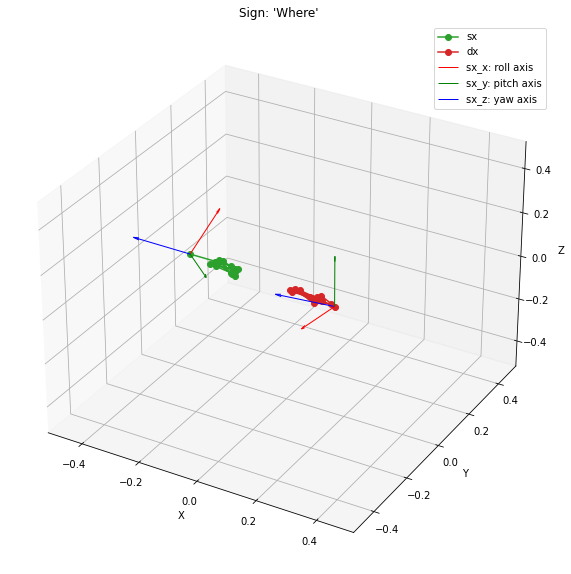

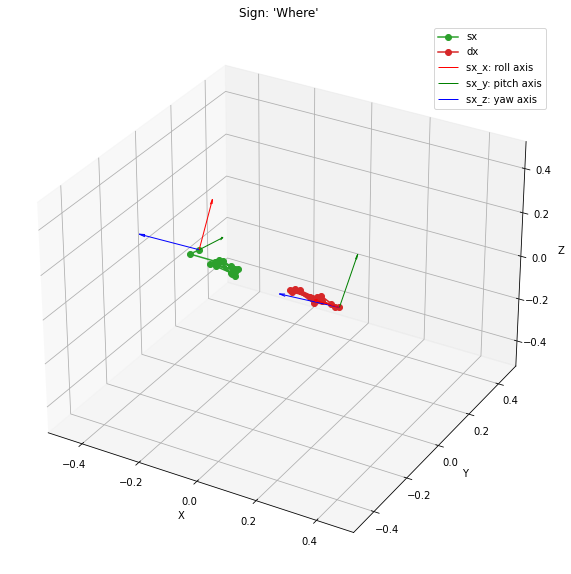

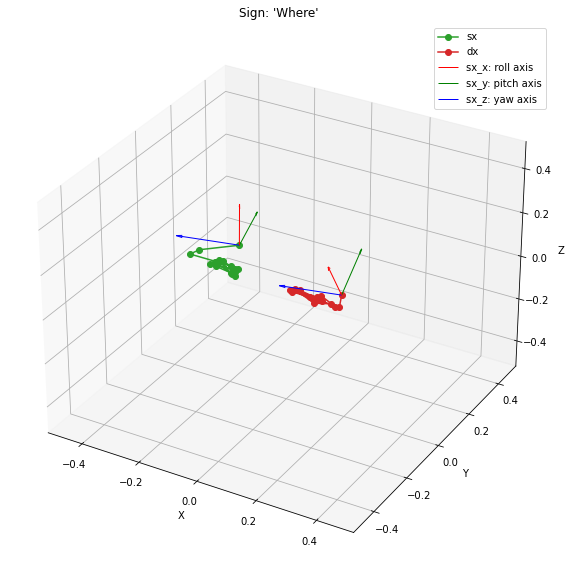

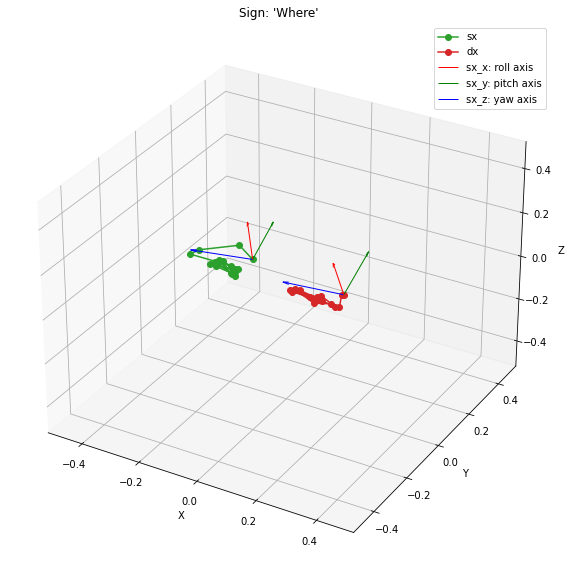

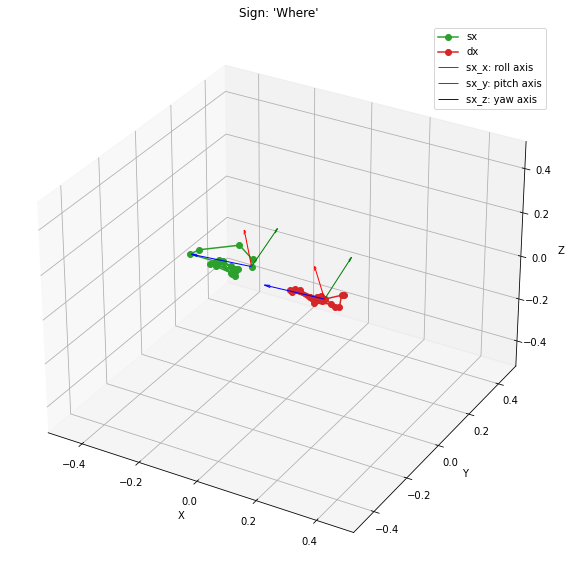

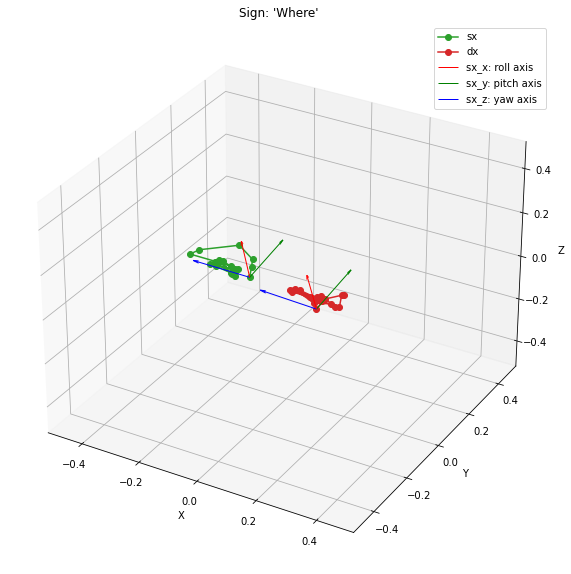

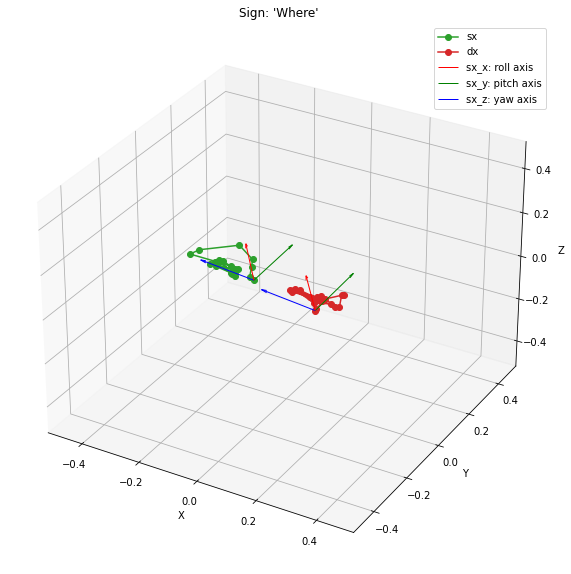

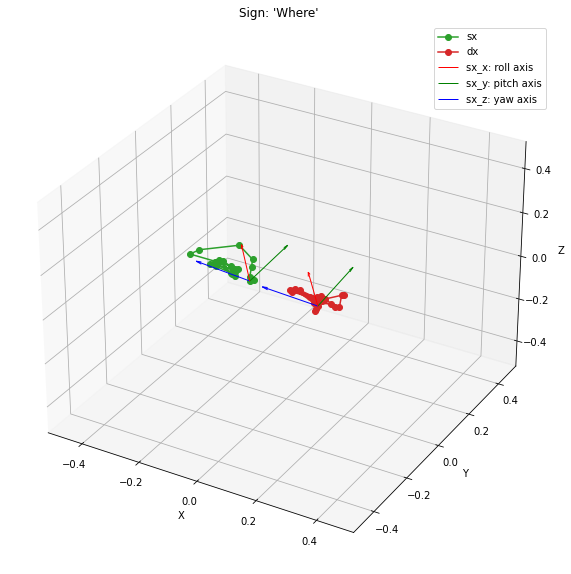

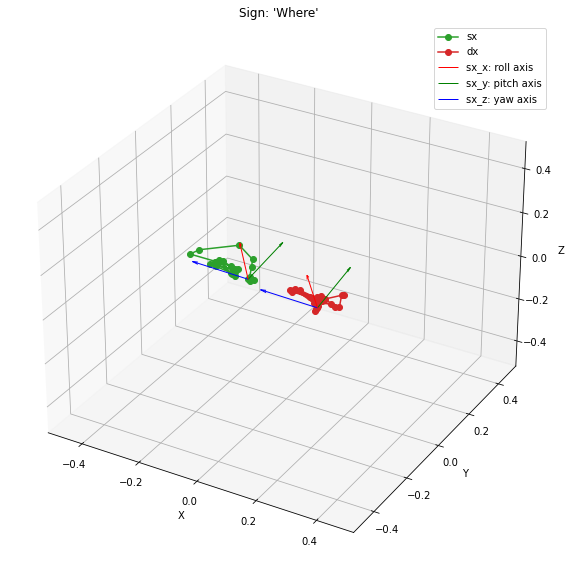

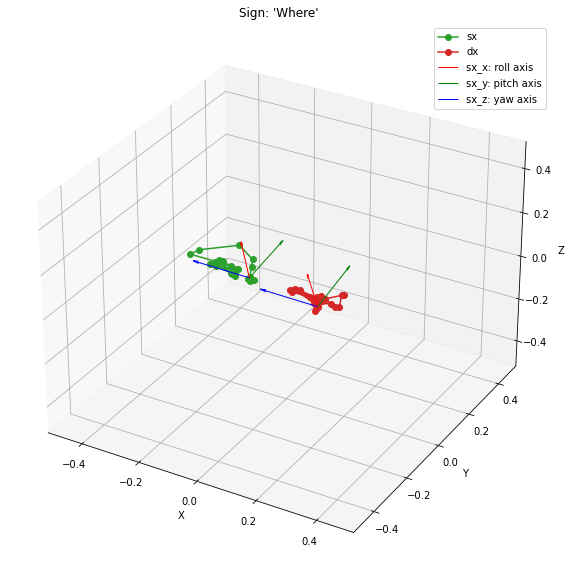

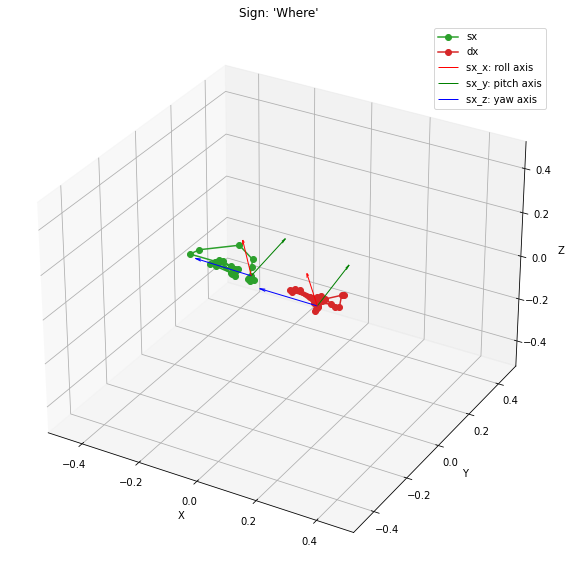

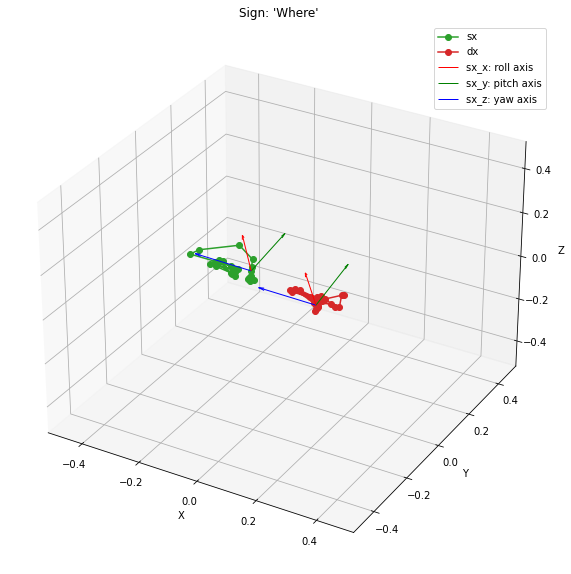

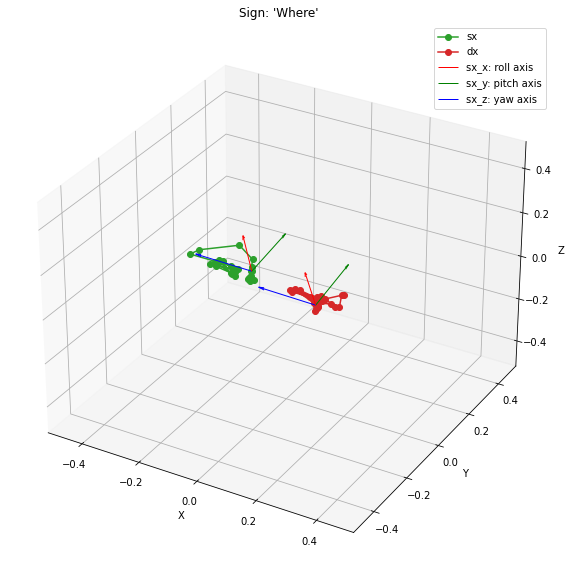

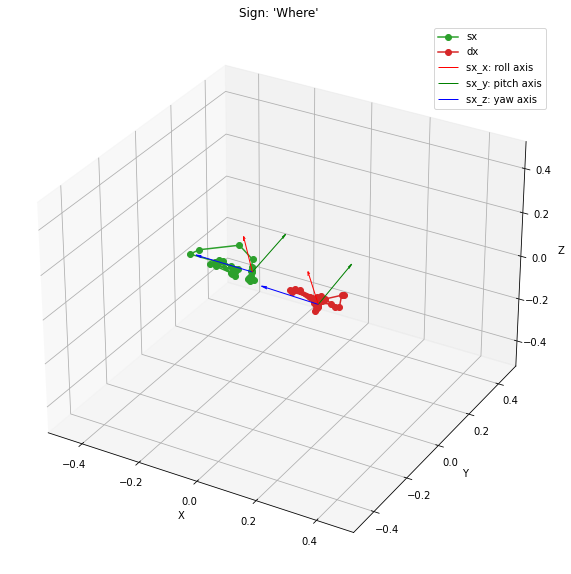

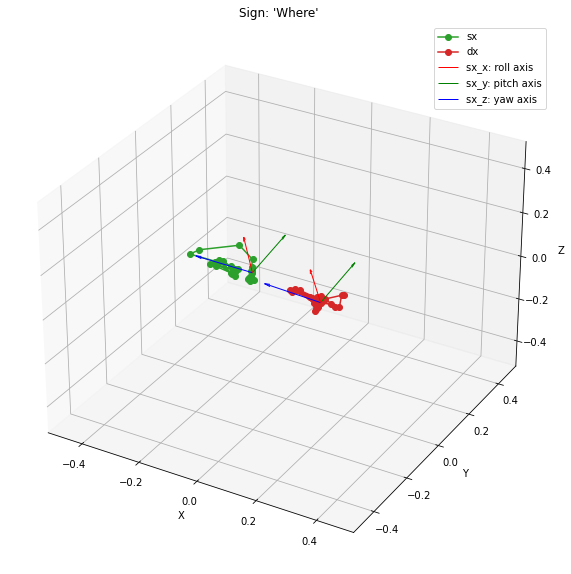

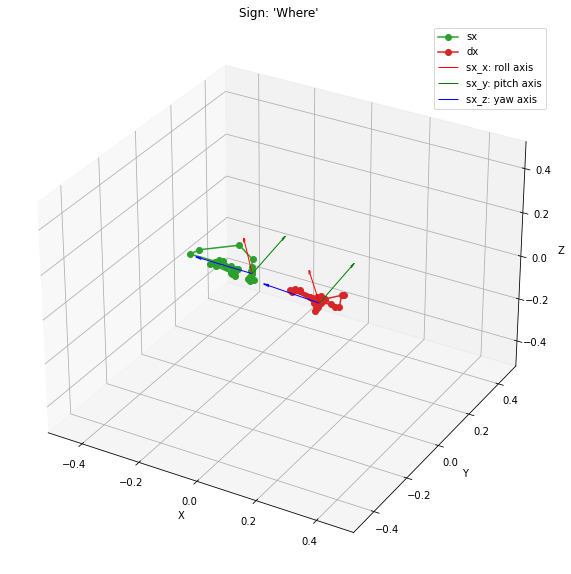

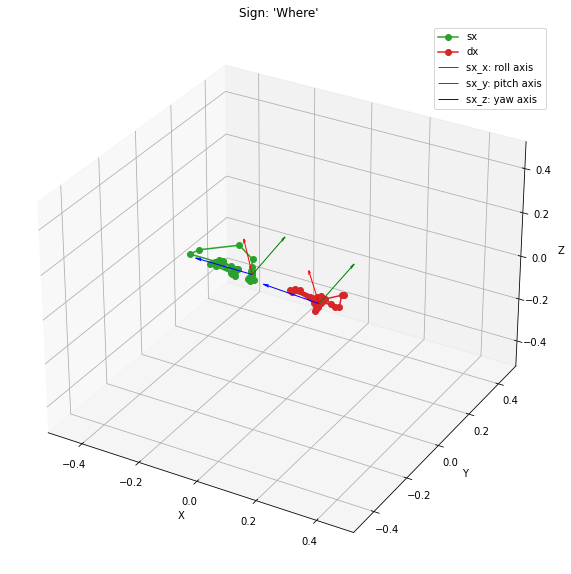

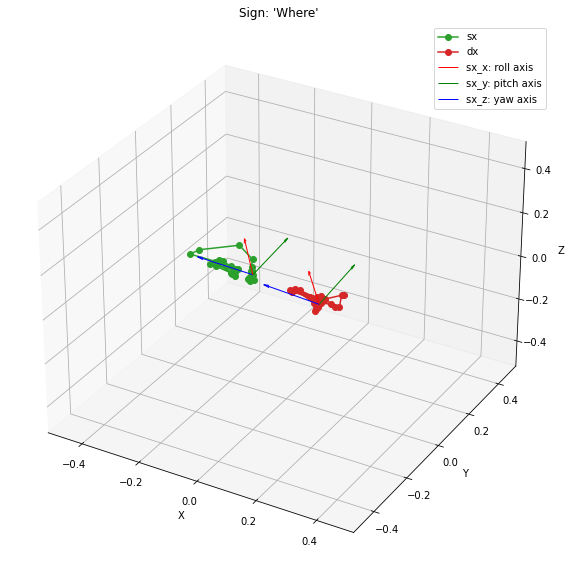

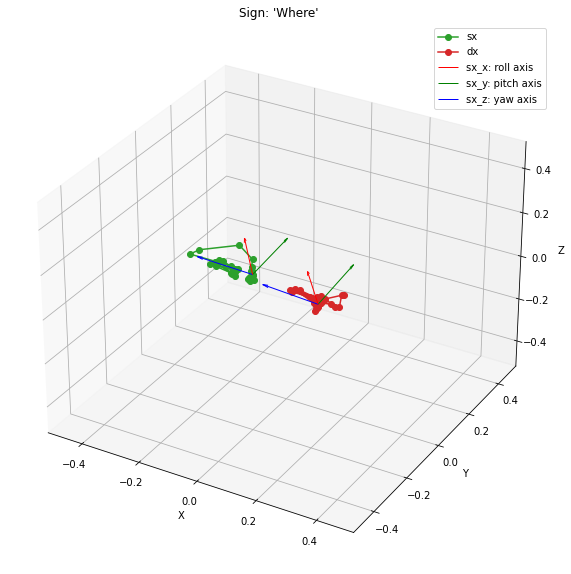

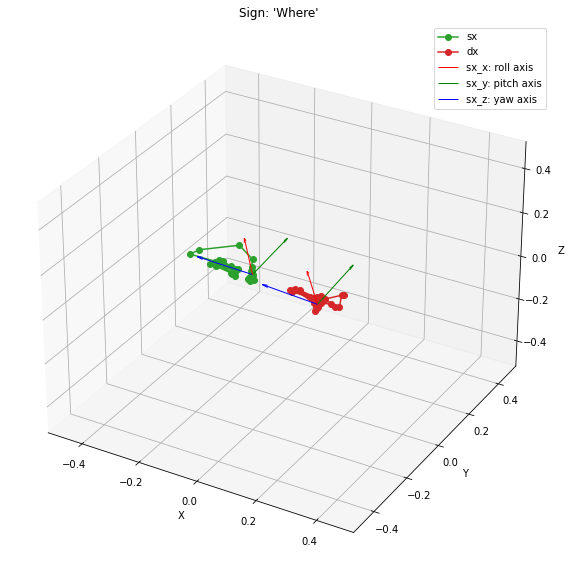

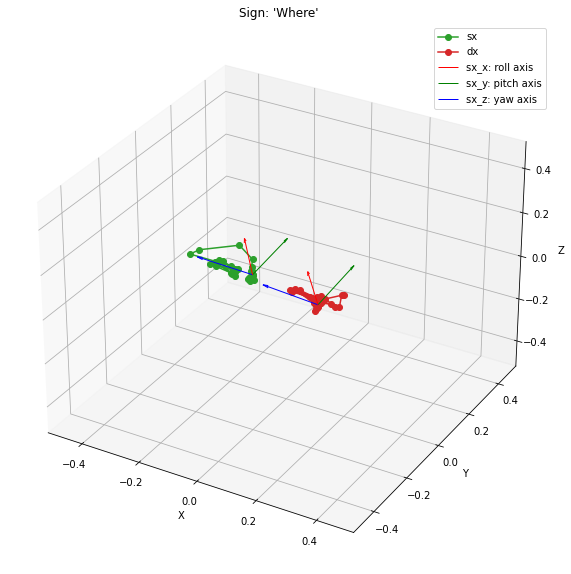

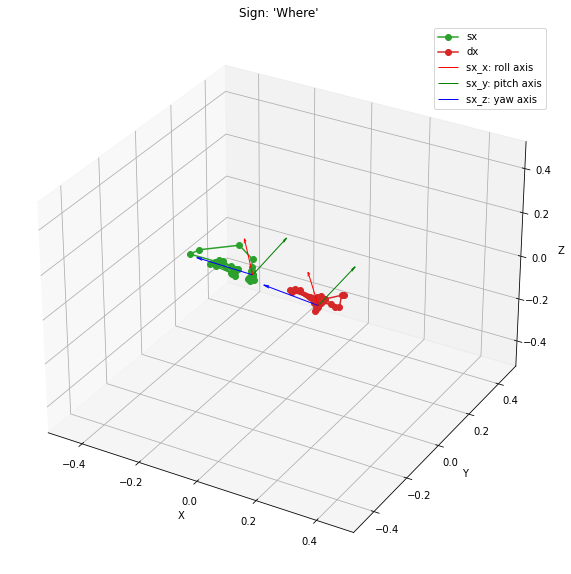

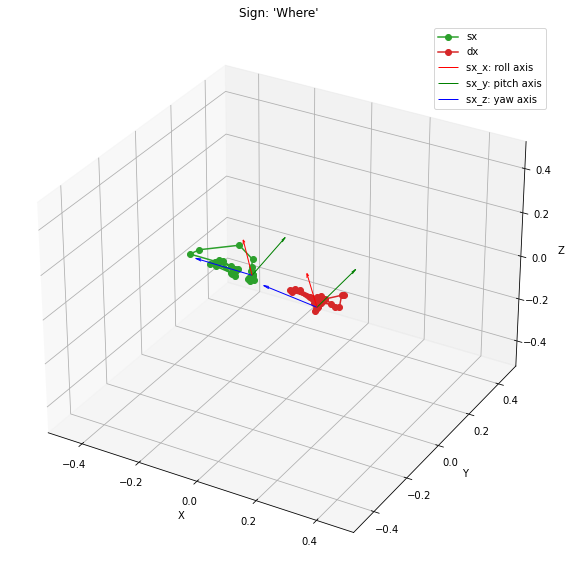

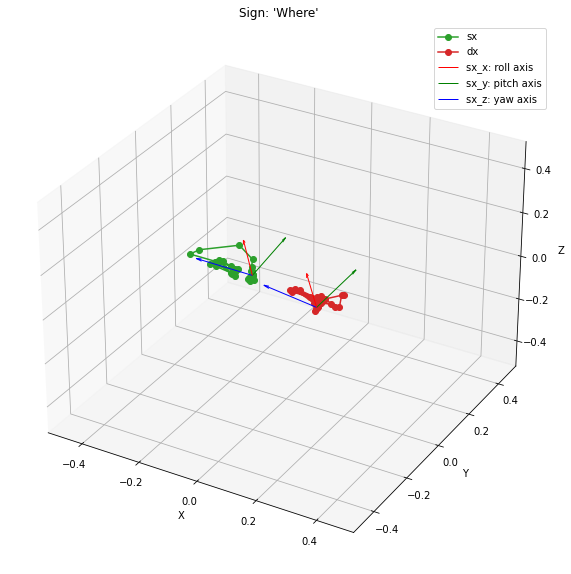

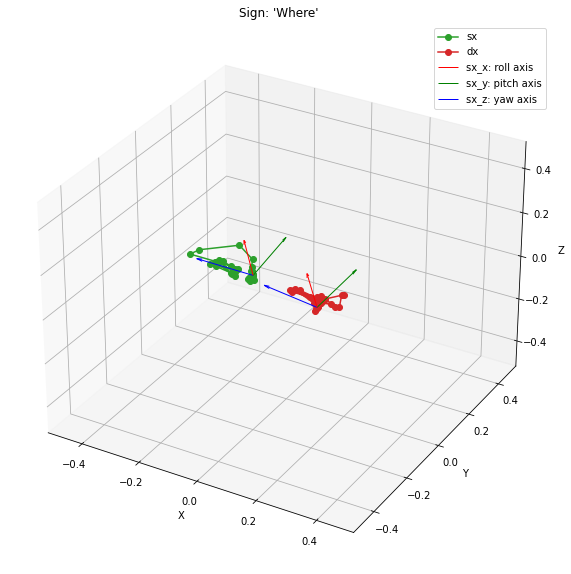

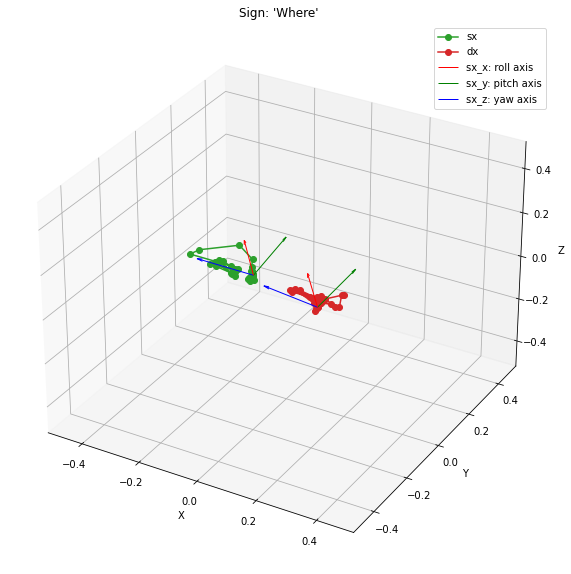

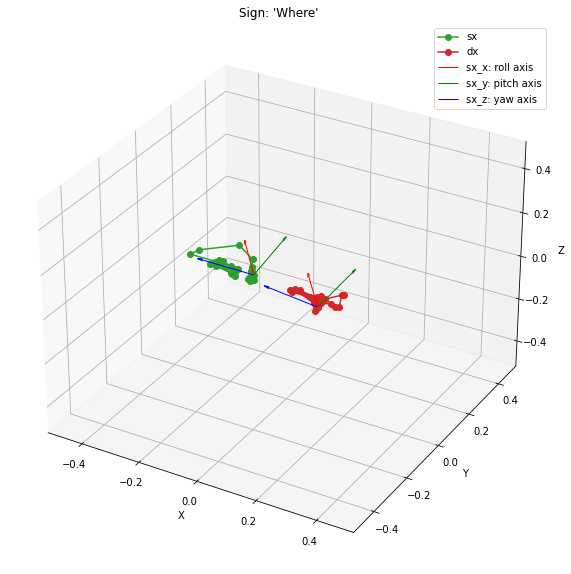

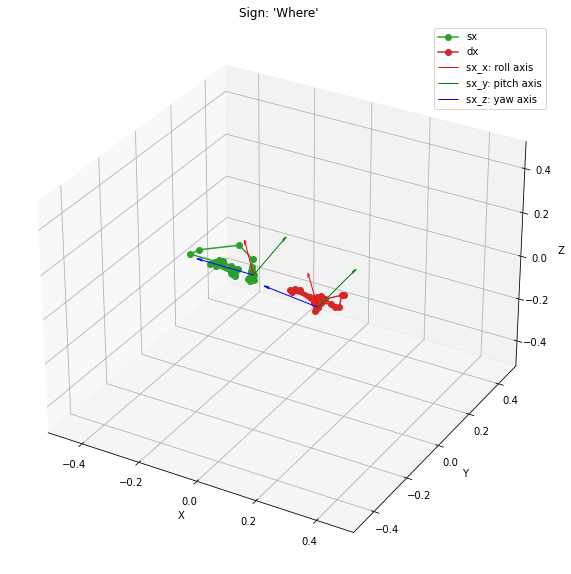

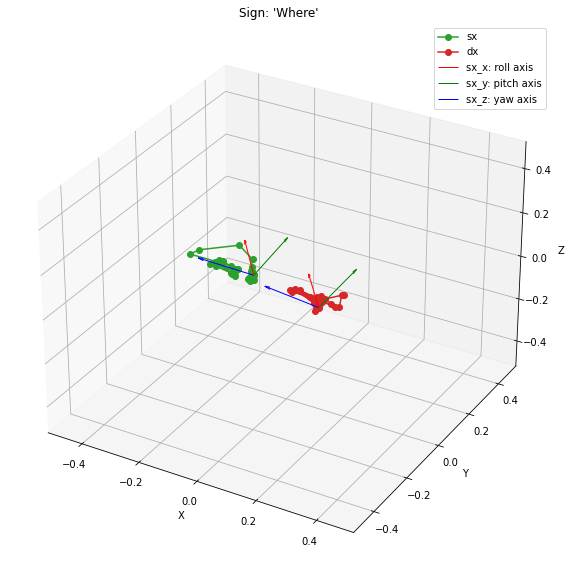

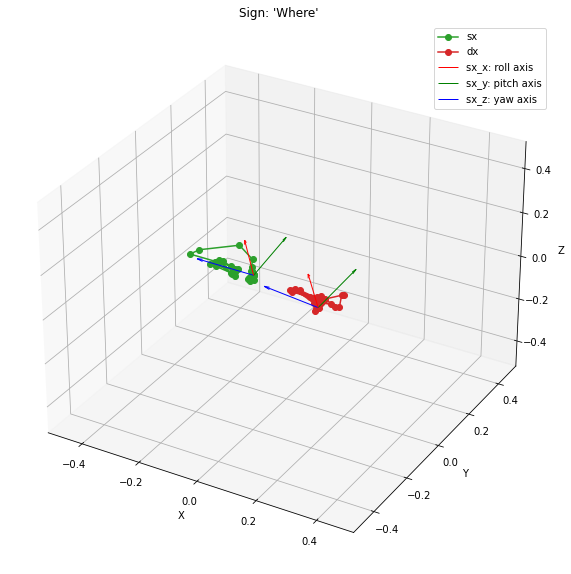

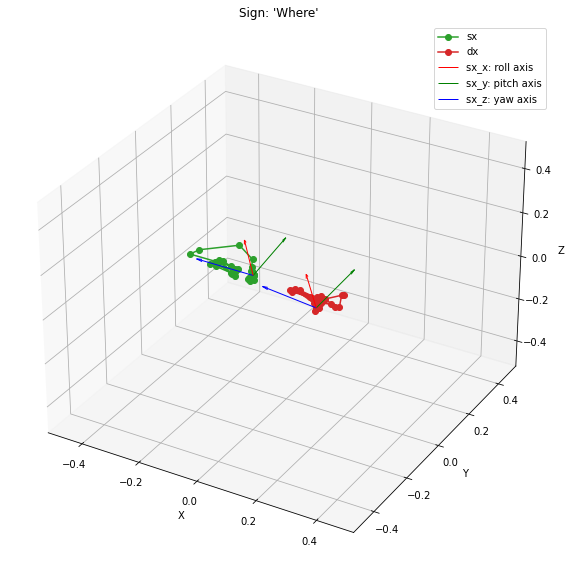

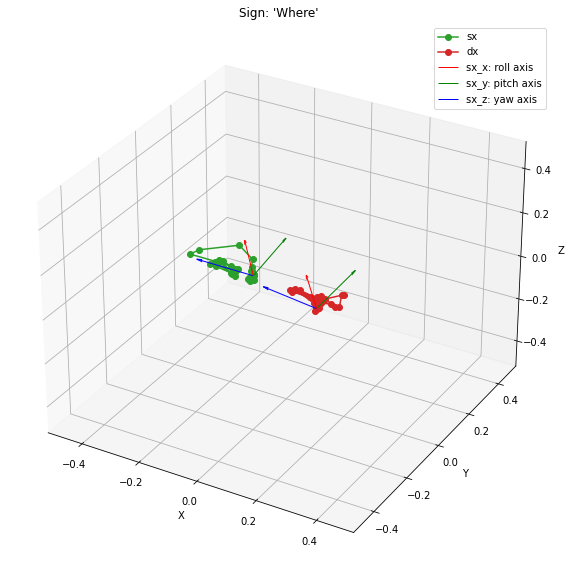

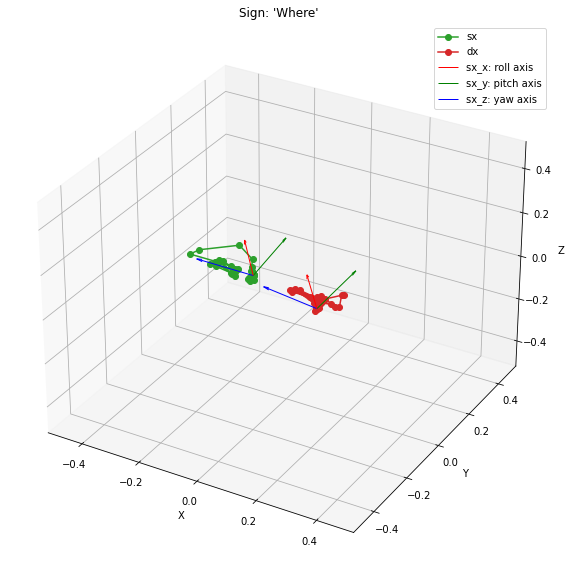

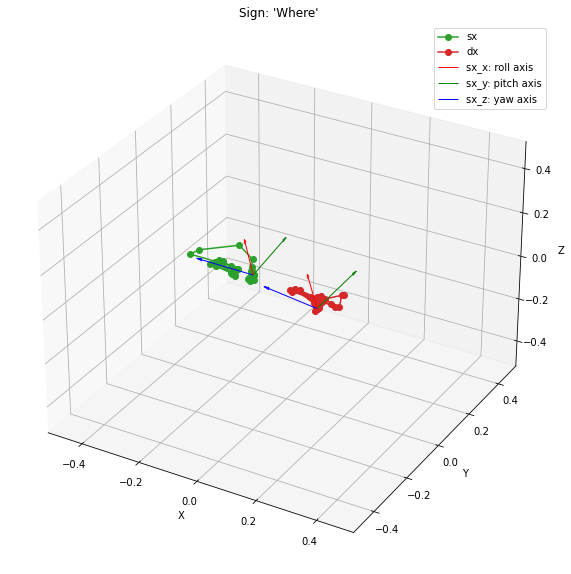

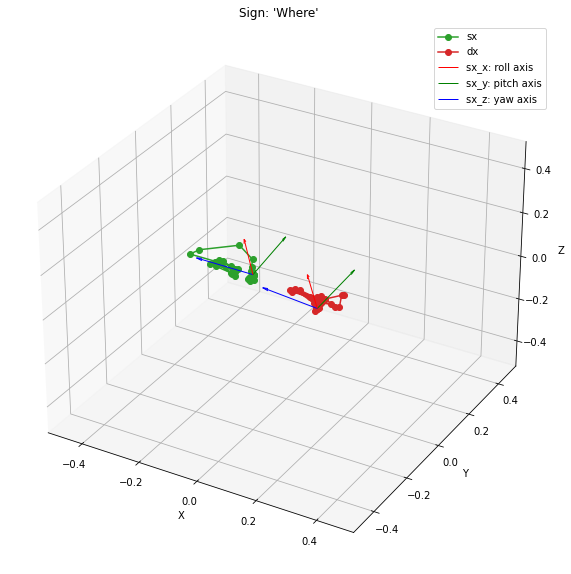

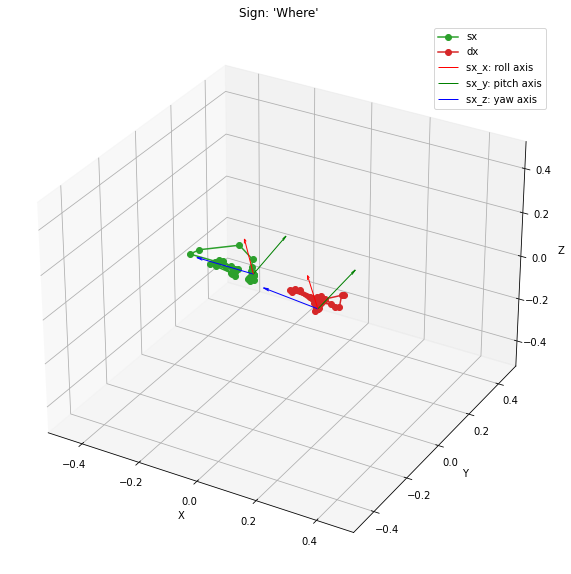

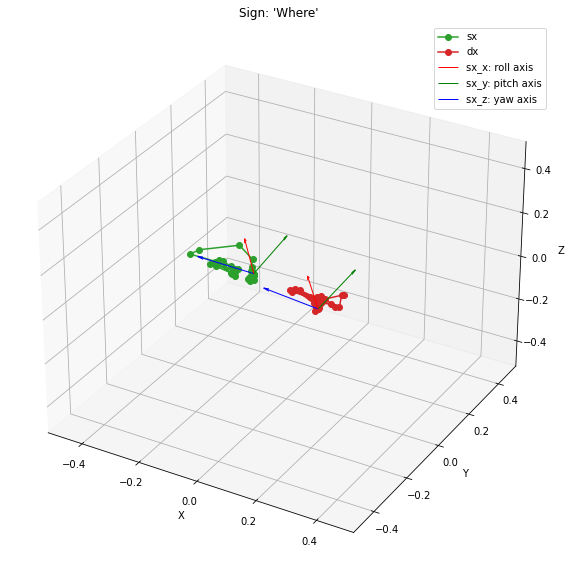

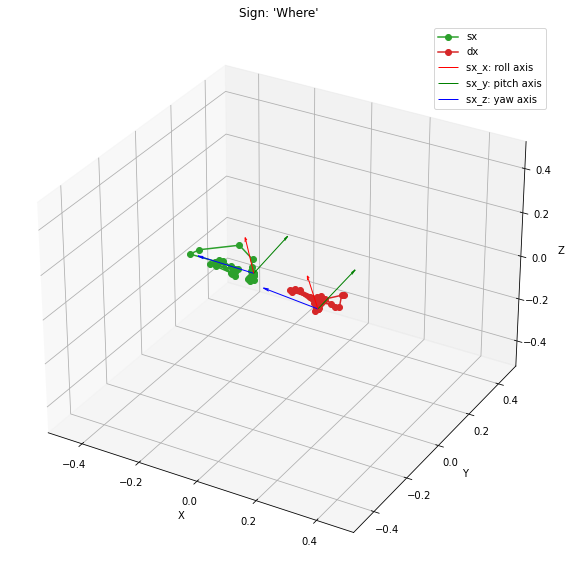

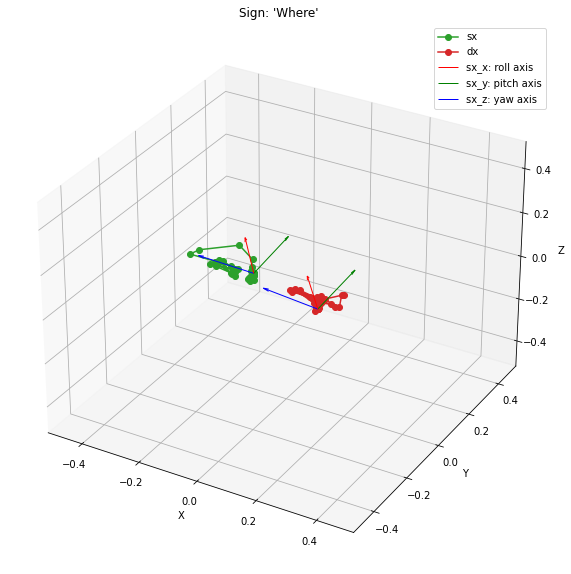

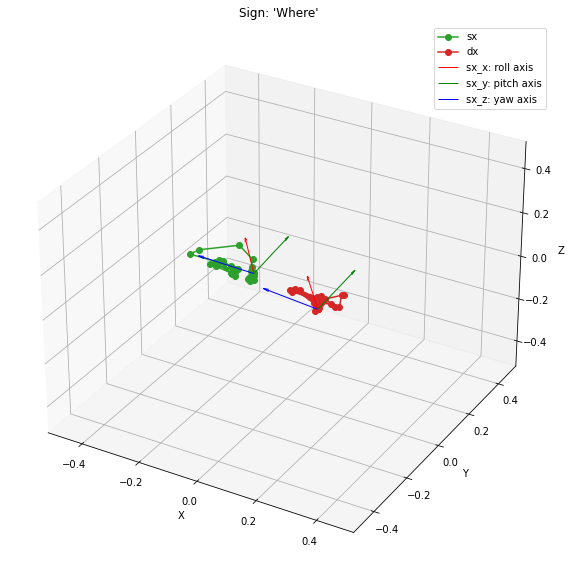

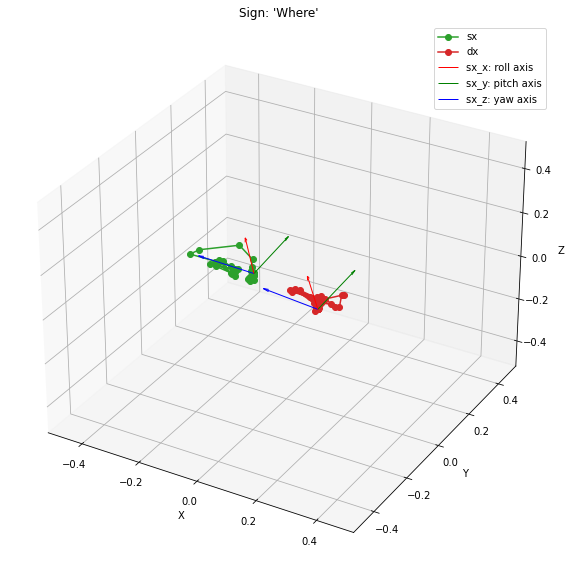

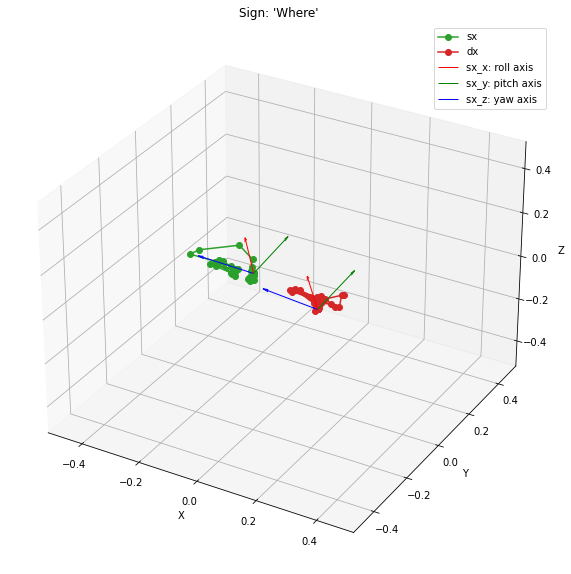

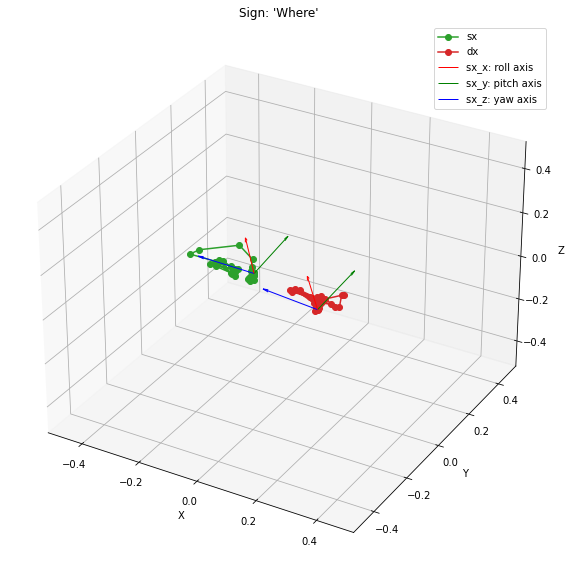

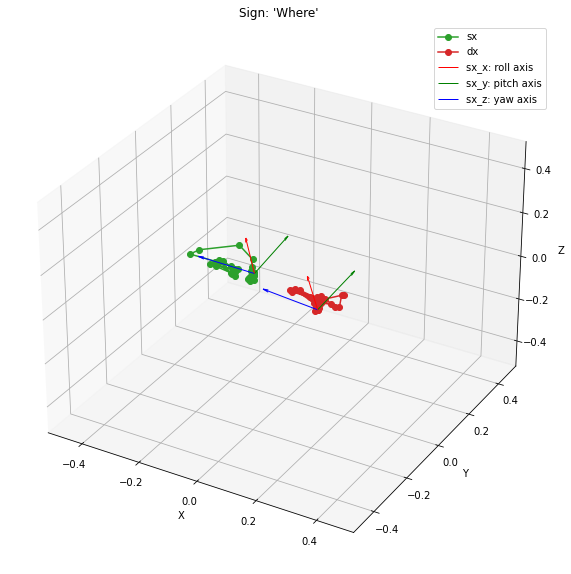

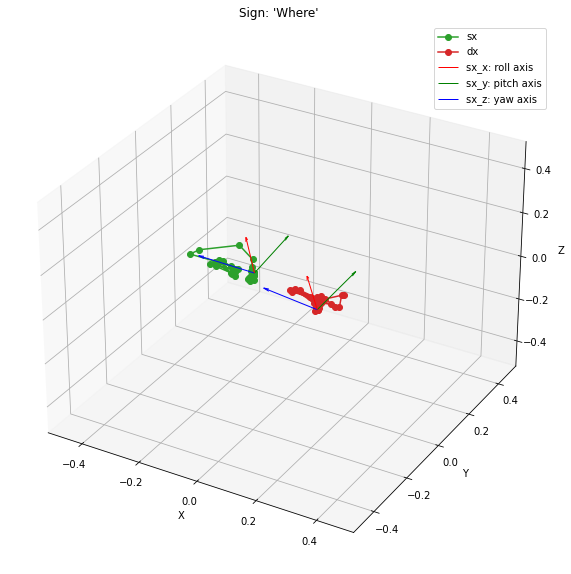

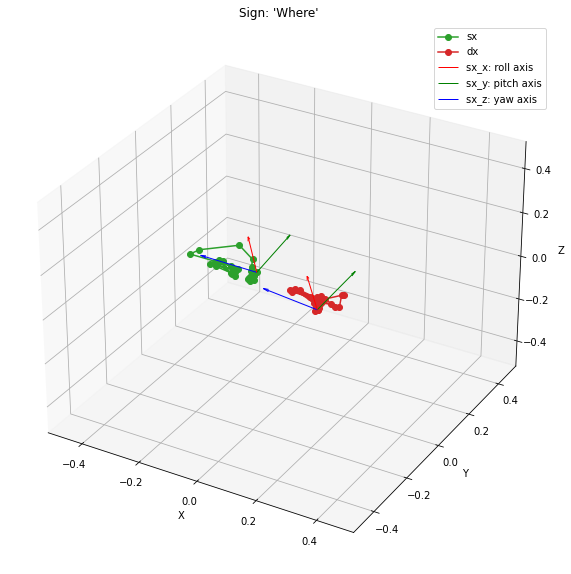

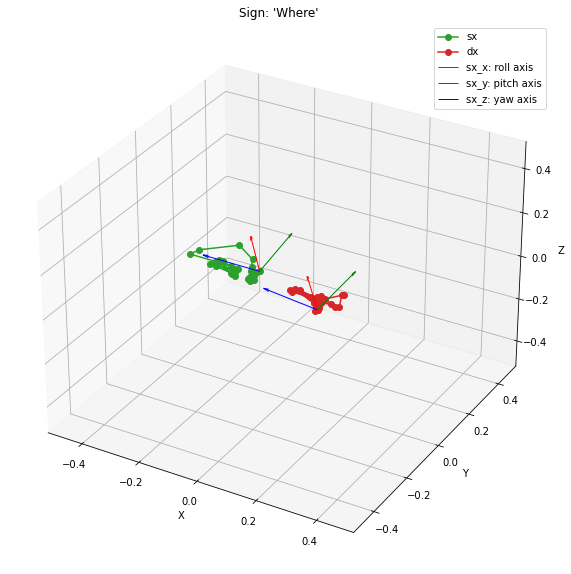

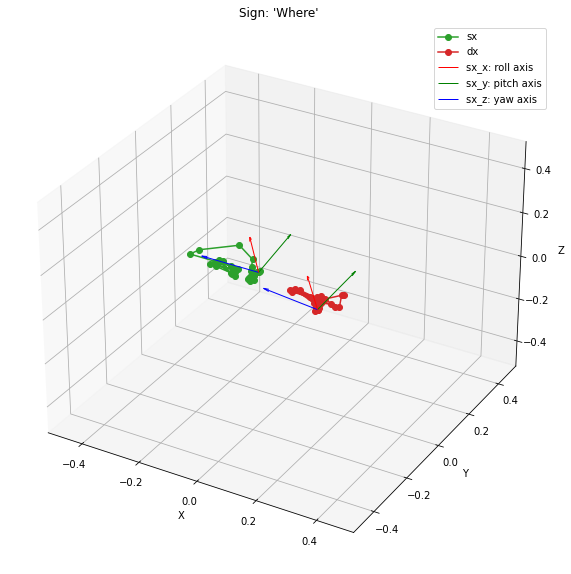

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n_features_per_hand = 11
sx_stack = spec_two_data[:,3:6]
dx_stack = spec_two_data[:,3+n_features_per_hand:6+n_features_per_hand]

v_dirs = np.array([[1, 0, 0], # versors' direction
                [0, 1, 0],
                [0, 0, 1]])

#origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point
origin = np.array([0,0,0]) # origin point, same origin point for x,y and, z
for i in range(one_data.shape[0]):
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    
    sx_xs = spec_two_data[:,0][:i + 1]
    sx_ys = spec_two_data[:,1][:i + 1]
    sx_zs = spec_two_data[:,2][:i + 1]
    sx_origin = np.array([sx_xs[-1], sx_ys[-1], sx_zs[-1]])
    ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
    
    dx_xs = spec_two_data[:,11][:i + 1]
    dx_ys = spec_two_data[:,12][:i + 1]
    dx_zs = spec_two_data[:,13][:i + 1]
    dx_origin = np.array([dx_xs[-1], dx_ys[-1], dx_zs[-1]])
    ax.plot(dx_xs, dx_ys, dx_zs, marker='o', label='dx', color='tab:red', alpha=1)
    
    
    sx_roll_angle = sx_stack[i,0]
    sx_pitch_angle = sx_stack[i,1]
    sx_yaw_angle = sx_stack[i,2]
    sx_R = rotation_matrix(sx_roll_angle, sx_pitch_angle, sx_yaw_angle)
    
    dx_roll_angle = dx_stack[i,0]
    dx_pitch_angle = dx_stack[i,1]
    dx_yaw_angle = dx_stack[i,2]
    dx_R = rotation_matrix(dx_roll_angle, dx_pitch_angle, dx_yaw_angle)
    
    U, V, W = zip(*v_dirs)
    sx_UVW = sx_R@np.array([U, V, W])
    dx_UVW = dx_R@np.array([U, V, W])

    ax.quiver(*sx_origin, *sx_UVW[0], color=['r'], length=.2, normalize=True, label='sx_x: roll axis', arrow_length_ratio=0.1, linewidths=1)
    ax.quiver(*sx_origin, *sx_UVW[1], color=['g'], length=.2, normalize=True, label='sx_y: pitch axis', arrow_length_ratio=0.1, linewidths=1)
    ax.quiver(*sx_origin, *sx_UVW[2], color=['b'], length=.2, normalize=True, label='sx_z: yaw axis', arrow_length_ratio=0.1, linewidths=1)

    ax.quiver(*dx_origin, *dx_UVW[0], color=['r'], length=.2, normalize=True, label='_dx_x: roll axis', arrow_length_ratio=0.1, linewidths=1)
    ax.quiver(*dx_origin, *dx_UVW[1], color=['g'], length=.2, normalize=True, label='_dx_y: pitch axis', arrow_length_ratio=0.1, linewidths=1)
    ax.quiver(*dx_origin, *dx_UVW[2], color=['b'], length=.2, normalize=True, label='_dx_z: yaw axis', arrow_length_ratio=0.1, linewidths=1)
    
    
    ax.set_xlim([-.5, .5])
    ax.set_ylim([-.5, .5])
    ax.set_zlim([-.5, .5])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.title("Sign: 'Where'")
    
    plt.legend()
    #plt.axis('off')
    
    if i < 10:
        plt.savefig(f"test_rpy_data/0{i}_test.png", format='png')
    else:
        plt.savefig(f"test_rpy_data/{i}_test.png", format='png')
    plt.show()


In [40]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('test_rpy_data/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/test_rpy_data_where.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [44]:
dx_stack[:,0]

array([0.134217, 0.413645, 0.98627 , 0.302911, 0.202445, 0.981082,
       0.976601, 0.985427, 0.986441, 0.975295, 0.975149, 0.97875 ,
       0.982266, 0.789718, 0.060961, 0.22316 , 0.357747, 0.393698,
       0.41091 , 0.431272, 0.442979, 0.437266, 0.430674, 0.427842,
       0.425986, 0.424021, 0.42501 , 0.426695, 0.425498, 0.424436,
       0.426365, 0.426804, 0.424473, 0.425999, 0.426194, 0.426963,
       0.427244, 0.427354, 0.427451, 0.427317, 0.427549, 0.426927,
       0.42551 , 0.424485, 0.423496, 0.422446, 0.42584 , 0.427732,
       0.425877, 0.423972, 0.423093, 0.42335 , 0.423972, 0.42418 ,
       0.424631, 0.425156, 0.425437, 0.425608, 0.426011, 0.426072,
       0.426023, 0.42617 , 0.426328, 0.426328, 0.425877, 0.425535,
       0.424815, 0.424131, 0.424204, 0.424619, 0.424766, 0.424754,
       0.425156, 0.425315, 0.424876, 0.424668, 0.423704, 0.422935,
       0.42263 , 0.422617, 0.422861, 0.422459, 0.421775, 0.421665,
       0.420969, 0.420029, 0.420139, 0.420078, 0.418845, 0.418

In [45]:
sx_stack[:,0]

array([0.777779, 0.904187, 0.919239, 0.914112, 0.911646, 0.925904,
       0.927333, 0.926856, 0.924708, 0.927406, 0.926319, 0.927467,
       0.925428, 0.919251, 0.834495, 0.667852, 0.535023, 0.475109,
       0.448961, 0.432041, 0.432347, 0.438499, 0.443895, 0.442357,
       0.441502, 0.438682, 0.438182, 0.438401, 0.438902, 0.438865,
       0.438377, 0.442051, 0.444749, 0.444615, 0.444737, 0.443663,
       0.438353, 0.438255, 0.437986, 0.438414, 0.43878 , 0.439598,
       0.440269, 0.441343, 0.443162, 0.443858, 0.443577, 0.442698,
       0.441441, 0.439732, 0.438743, 0.444774, 0.444481, 0.444542,
       0.444456, 0.444273, 0.442796, 0.441465, 0.441588, 0.441319,
       0.440648, 0.441099, 0.441942, 0.443052, 0.444285, 0.445006,
       0.440025, 0.438206, 0.438511, 0.438926, 0.439341, 0.439512,
       0.439451, 0.441404, 0.442833, 0.441685, 0.439476, 0.438035,
       0.438169, 0.43889 , 0.439341, 0.440745, 0.442601, 0.443419,
       0.443895, 0.443944, 0.443895, 0.443529, 0.442698, 0.442